In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import time
import logging
import argparse
import itertools
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import numpy as np
from measures import DataStore

In [3]:
directory = "5-bilinear-continuum/data/"
keys=['I_ext_1','I_ext_2']
n1, n2 = 31, 31 
ds = DataStore(directory)
ds.load()
ds.process(keys)

  0%|          | 0/961 [00:00<?, ?it/s]

In [4]:
def slice_data(ds, output, keys, raise_on_error=False):
    for idxs, vals in zip(
        itertools.product(*[range(len(ds.keyvals[key])) for key in keys]),
        itertools.product(*[ds.keyvals[key] for key in keys])):
        try:
            output[idxs] = ds.data[vals]
        except:
            if raise_on_error:
                raise StandardError

In [5]:
@np.vectorize
def speed(val):
    # Skip empty entries
    if val == 0:
        return np.NaN
    
    # Skip if correlation is <0.05
    q = val['q'][1:-1,:750]
    q_max = q.max(axis=1)
    idxs = q.argmax(axis=1)
    idxs = idxs[q_max.mean() > 0.05]
    if len(idxs) == 0:
        return np.NaN
    
    # Retrieval time is computed according to the average time interval between consecutive correlation peaks
    diffs = np.diff(idxs)
    diffs = diffs[np.logical_and(
        diffs < diffs.mean()+2*diffs.std(),
        diffs > diffs.mean()-2*diffs.std())]
    if len(diffs) == 0:
        return np.NaN
    return np.mean(diffs)

In [6]:
# Selected input indices
i1, j1 = 28, 7 
i2, j2 = 11, 22 
i3, j3 = 7, 22

In [7]:
ext1 = ds.keyvals['I_ext_1']
ext2 = ds.keyvals['I_ext_2']

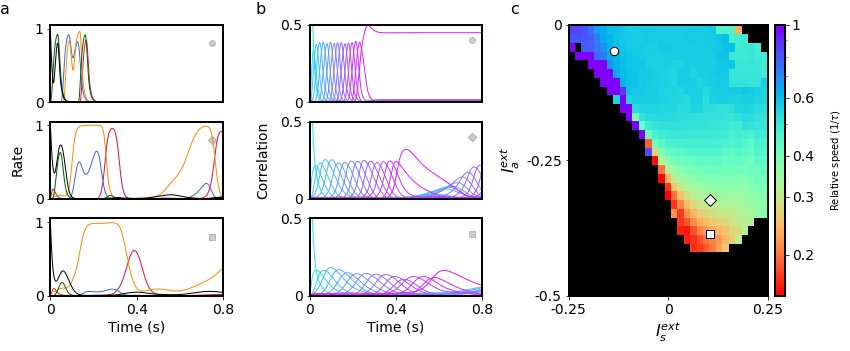

In [8]:
import copy
import matplotlib
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams['axes.linewidth'] = 2

fig = plt.figure(constrained_layout=False, figsize=(12,4))
gs1 = fig.add_gridspec(nrows=3, ncols=1,
                       left=0.05, right=0.25, top=0.94, bottom=0,
                       hspace=0.25, wspace=0)
ax1 = fig.add_subplot(gs1[0,:])
ax2 = fig.add_subplot(gs1[1,:])
ax3 = fig.add_subplot(gs1[2,:])

gs2 = fig.add_gridspec(nrows=3, ncols=1,
                       left=0.35, right=0.55, top=0.94, bottom=0,
                       hspace=0.25, wspace=0)
ax4 = fig.add_subplot(gs2[0,:])
ax5 = fig.add_subplot(gs2[1,:])
ax6 = fig.add_subplot(gs2[2,:])

ax = np.asarray([[ax1, ax2, ax3], [ax4, ax5, ax6]]).T

gs3 = fig.add_gridspec(nrows=1, ncols=1, 
                       left=0.65, right=0.9, top=0.94, bottom=0.0)
ax7 = fig.add_subplot(gs3[:,:])

ext1 = ds.keyvals['I_ext_1']
ext2 = ds.keyvals['I_ext_2']

ax2.set_ylabel("Rate", labelpad=10, fontsize=14)
ax5.set_ylabel("Correlation", labelpad=10, fontsize=14)


## -----------------------------------------------------------
## ------- Panel a -------------------------------------------
## -----------------------------------------------------------

T = 0.801
dt = 1e-3
t = np.arange(0,T-dt,dt)

idx_start = 25
idx_stop = 30

colors_ = ['crimson','royalblue','darkorange','darkgreen','k']

for i, m in enumerate(ds.data[ext1[i1],ext2[j1]]['r'][idx_start:idx_stop,:]):
    ax1.plot(t,m[:800], linewidth=1, c=colors_[i]);
for i, m in enumerate(ds.data[ext1[i2],ext2[j2]]['r'][idx_start:idx_stop,:]):
    ax2.plot(t,m[:800], linewidth=1, c=colors_[i]);
for i, m in enumerate(ds.data[ext1[i3],ext2[j3]]['r'][idx_start:idx_stop,:]):
    ax3.plot(t,m[:800], linewidth=1, c=colors_[i]);
    
for i, marker in enumerate(['o','D','s']):
    ax[i,0].scatter(0.75,0.80, color='k', marker=marker, alpha=0.1)
    ax[i,0].scatter(0.75,0.80, color='k', marker=marker, alpha=0.1)
    
for i in range(3):
    ax[i,0].set_xlim([0,0.8])
    ax[i,0].set_xlim([0,0.8])
    ax[i,0].set_yticks([0,1])
    ax[i,0].set_yticklabels([0,1], fontsize=14)
    if i < 2:
        ax[i,0].set_xticks([])
        ax[i,0].set_xticks([])

ax3.set_xticks([0,0.4,0.8])
ax3.set_xticklabels([0,0.4,0.8], fontsize=14)
ax1.set_ylim([0,1.05])
ax2.set_ylim([0,1.05])
ax3.set_ylim([0,1.05])

ax2.set_ylabel("Rate", fontsize=14)
ax3.set_xlabel("Time (s)", fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.25)


## -----------------------------------------------------------
## ------- Panel b -------------------------------------------
## -----------------------------------------------------------

cmap = matplotlib.cm.get_cmap('cool')
colors_ = [cmap(x) for x in np.linspace(0.1,0.9,16)]

T = 0.801
dt = 1e-3
t = np.arange(0,T-dt,dt)

for i, m in enumerate(ds.data[ext1[i1],ext2[j1]]['q']):
    ax[0,1].plot(t, m[:800], linewidth=1, c=colors_[i]);
for i, m in enumerate(ds.data[ext1[i2],ext2[j2]]['q']):
    ax[1,1].plot(t, m[:800], linewidth=1, c=colors_[i]);
for i, m in enumerate(ds.data[ext1[i3],ext2[j3]]['q']):
    ax[2,1].plot(t, m[:800], linewidth=1, c=colors_[i]);
    
for i, marker in enumerate(['o','D','s']):
    ax[i,1].scatter(0.75,0.40, color='k', marker=marker, alpha=0.1)
    ax[i,1].scatter(0.75,0.40, color='k', marker=marker, alpha=0.1)
    
for i in range(3):
    ax[i,1].set_xlim([0,0.8])
    ax[i,1].set_xlim([0,0.8])
    ax[i,1].set_yticks([0,0.5])
    ax[i,1].set_yticklabels([0,0.5], fontsize=14)
    if i < 2:
        ax[i,1].set_xticks([])
        ax[i,1].set_xticks([])
        
ax[2,1].set_xticks([0,0.4,0.8])
ax[2,1].set_xticklabels([0,0.4,0.8], fontsize=14)
ax[0,1].set_ylim([0,0.5])
ax[1,1].set_ylim([0,0.5])
ax[2,1].set_ylim([0,0.5])
    
ax[-1,1].set_xlabel("Time (s)", fontsize=14)
ax[1,1].set_ylabel("Correlation", fontsize=14)

plt.subplots_adjust(hspace=0.3, wspace=0.25)


## -----------------------------------------------------------
## ------- Panel c -------------------------------------------
## -----------------------------------------------------------

output = np.zeros((n1,n2), dtype=object)
slice_data(ds, output, keys)

s = speed(output)
s[np.isnan(s)] = np.inf
cm = copy.copy(matplotlib.cm.get_cmap('rainbow_r'))
cm.set_bad(color='k')
tau = 10.
s = tau/s

X, Y = np.meshgrid(np.arange(n1+1),np.arange(n2+1))
im1 = ax7.pcolor(X, Y, s, cmap=cm,
                rasterized=True,
                norm=colors.LogNorm(vmin=0.15, vmax=1.))
divider = make_axes_locatable(ax7)
cax1 = divider.append_axes('right', size='5%', pad=0.10)
cb = fig.colorbar(im1, cax=cax1, ticks=[0.2,0.3,0.4,0.6,1]);
cb.set_label(r"Relative speed ($1/\tau$)", labelpad=15)
cb.ax.set_yticklabels([0.2,0.3,0.4,0.6,1], fontsize=14)

ax7.set_xticks([0,n1/2,n1]) 
ax7.set_yticks([0,n2/2,n2]) 
ax7.set_xlim([0,n1])
ax7.set_ylim([0,n2])
ax7.set_xticklabels([-0.25,0,0.25], fontsize=14);
ax7.set_yticklabels([-0.5,-0.25,0], fontsize=14);
ax7.set_xlabel(r"$I^{ext}_s$", fontsize=16)
ax7.set_ylabel(r"$I^{ext}_a$", fontsize=16)

for (i,j,marker) in [(i1,j1,'o'),(i2,j2,'D',),(i3,j3,'s')][:]:
    ax7.scatter(j,i,s=70, color='white',marker=marker, edgecolors='k')
    
plt.annotate(s="a", xy=(0.0,0.96), xycoords='figure fraction', fontsize=16);
plt.annotate(s="b", xy=(0.3,0.96), xycoords='figure fraction', fontsize=16);
plt.annotate(s="c", xy=(0.6,0.96), xycoords='figure fraction', fontsize=16);

fig.savefig("5.pdf", dpi=150, bbox_inches='tight')